In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [3]:
BASE_PATH = Path("/scratch/an3854/DL24FA")

In [4]:
# Function to get shapes without loading full data
def get_data_shapes(folder_path):
    """Get shapes of data files without loading them fully."""
    shapes = {}
    print(f"\nChecking shapes in {folder_path}")
    
    # Check states.npy
    with np.load(str(folder_path / "states.npy"), mmap_mode='r') as f:
        shapes['states'] = f.shape
        print(f"States shape: {f.shape}")
    
    # Check actions.npy
    with np.load(str(folder_path / "actions.npy"), mmap_mode='r') as f:
        shapes['actions'] = f.shape
        print(f"Actions shape: {f.shape}")
    
    # Try to check locations.npy
    try:
        with np.load(str(folder_path / "locations.npy"), mmap_mode='r') as f:
            shapes['locations'] = f.shape
            print(f"Locations shape: {f.shape}")
    except FileNotFoundError:
        print("No locations file found")
    
    return shapes

# Get shapes for each dataset
print("Getting shapes for all datasets...")
dataset_shapes = {
    'probe_normal_train': get_data_shapes(BASE_PATH / "probe_normal/train"),
    'probe_normal_val': get_data_shapes(BASE_PATH / "probe_normal/val"),
    'probe_wall_val': get_data_shapes(BASE_PATH / "probe_wall/val"),
}

def load_single_trajectory(folder_path, index=0):
    """Load a single trajectory from the dataset."""
    data = {}
    
    with np.load(str(folder_path / "states.npy"), mmap_mode='r') as f:
        data['states'] = f[index].copy()
    
    with np.load(str(folder_path / "actions.npy"), mmap_mode='r') as f:
        data['actions'] = f[index].copy()
    
    try:
        with np.load(str(folder_path / "locations.npy"), mmap_mode='r') as f:
            data['locations'] = f[index].copy()
    except FileNotFoundError:
        pass
    
    return data

# Load sample trajectories from each dataset
print("\nLoading sample trajectories...")
sample_trajectories = {
    'probe_normal_train': load_single_trajectory(BASE_PATH / "probe_normal/train", 0),
    'probe_normal_val': load_single_trajectory(BASE_PATH / "probe_normal/val", 0),
    'probe_wall_val': load_single_trajectory(BASE_PATH / "probe_wall/val", 0)
}

def visualize_state(state, locations=None, title=""):
    """Visualize a single state (2 channels)."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Agent channel
    ax1.imshow(state[0], cmap='gray')
    ax1.set_title('Agent Channel')
    if locations is not None:
        ax1.scatter(locations[0], locations[1], c='red', marker='x', s=100)
    ax1.axis('off')
    
    # Wall channel
    ax2.imshow(state[1], cmap='gray')
    ax2.set_title('Wall Channel')
    ax2.axis('off')
    
    plt.suptitle(title)
    plt.show()

def visualize_trajectory(states, locations=None, num_steps=5):
    """Visualize trajectory over time."""
    fig, axes = plt.subplots(2, num_steps, figsize=(num_steps*4, 8))
    
    # Select evenly spaced frames
    indices = np.linspace(0, len(states)-1, num_steps, dtype=int)
    
    for i, idx in enumerate(indices):
        # Agent channel
        axes[0, i].imshow(states[idx, 0], cmap='gray')
        axes[0, i].set_title(f'Step {idx}')
        if locations is not None:
            axes[0, i].scatter(locations[idx, 0], locations[idx, 1], c='red', marker='x', s=100)
        axes[0, i].axis('off')
        
        # Wall channel
        axes[1, i].imshow(states[idx, 1], cmap='gray')
        axes[1, i].axis('off')
    
    plt.suptitle('Trajectory Visualization')
    plt.show()

# Visualize first state from each dataset
print("\nVisualizing first state from each dataset...")
for name, traj in sample_trajectories.items():
    print(f"\nFirst state from {name}")
    visualize_state(
        traj['states'][0], 
        traj.get('locations', [None])[0] if 'locations' in traj else None,
        f"First State from {name}"
    )

# Visualize trajectories
print("\nVisualizing trajectories...")
for name, traj in sample_trajectories.items():
    print(f"\nTrajectory from {name}")
    visualize_trajectory(
        traj['states'],
        traj.get('locations', None),
        num_steps=5
    )

# Analyze actions from sample trajectories
plt.figure(figsize=(12, 6))
for name, traj in sample_trajectories.items():
    actions = traj['actions']
    plt.scatter(actions[:, 0], actions[:, 1], alpha=0.5, label=name)
plt.title('Action Distribution (Sample Trajectory)')
plt.xlabel('Delta X')
plt.ylabel('Delta Y')
plt.legend()
plt.grid(True)
plt.show()

# Analyze locations from sample trajectories
plt.figure(figsize=(12, 6))
for name, traj in sample_trajectories.items():
    if 'locations' in traj:
        locations = traj['locations']
        plt.scatter(locations[:, 0], locations[:, 1], alpha=0.5, label=name)
plt.title('Agent Locations Distribution (Sample Trajectory)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.show()

# Print statistics for sample trajectories
for name, traj in sample_trajectories.items():
    print(f"\nStatistics for {name}:")
    
    # Action statistics
    actions = traj['actions']
    print("\nAction statistics:")
    print(f"Mean dx, dy: {np.mean(actions, axis=0)}")
    print(f"Std dx, dy: {np.std(actions, axis=0)}")
    print(f"Min dx, dy: {np.min(actions, axis=0)}")
    print(f"Max dx, dy: {np.max(actions, axis=0)}")
    
    # Location statistics if available
    if 'locations' in traj:
        locations = traj['locations']
        print("\nLocation statistics:")
        print(f"Mean x, y: {np.mean(locations, axis=0)}")
        print(f"Std x, y: {np.std(locations, axis=0)}")
        print(f"Min x, y: {np.min(locations, axis=0)}")
        print(f"Max x, y: {np.max(locations, axis=0)}")

Getting shapes for all datasets...

Checking shapes in /scratch/an3854/DL24FA/probe_normal/train


AttributeError: __enter__


Analyzing trajectory from probe_normal/train
Trajectory visualization:


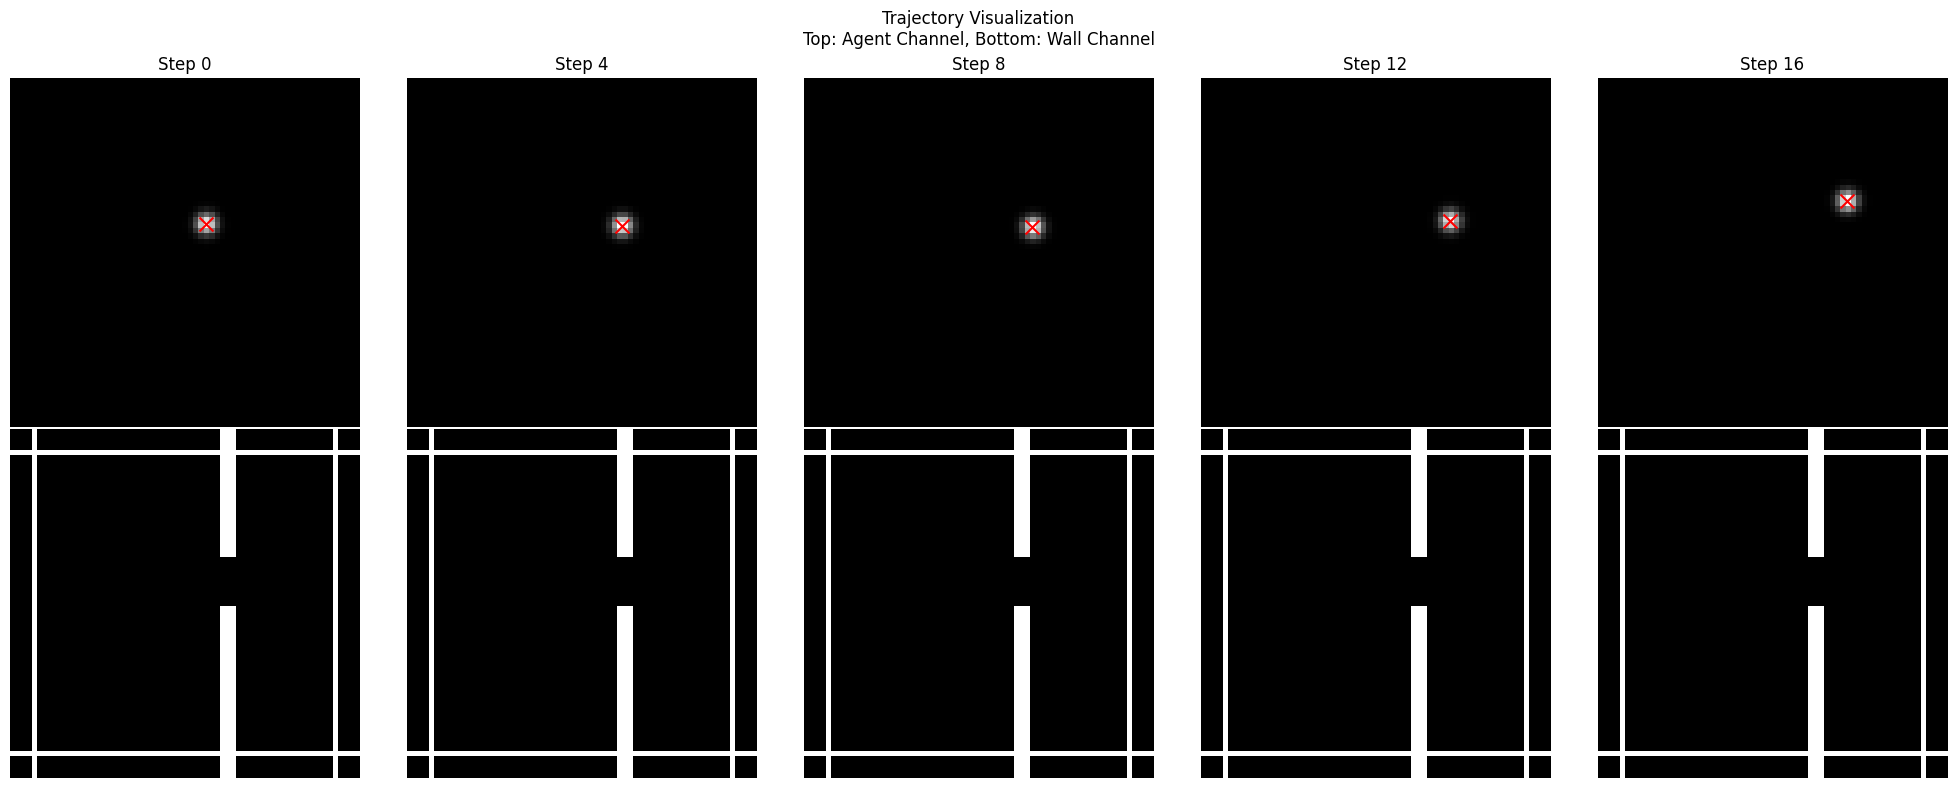

Detailed trajectory analysis:


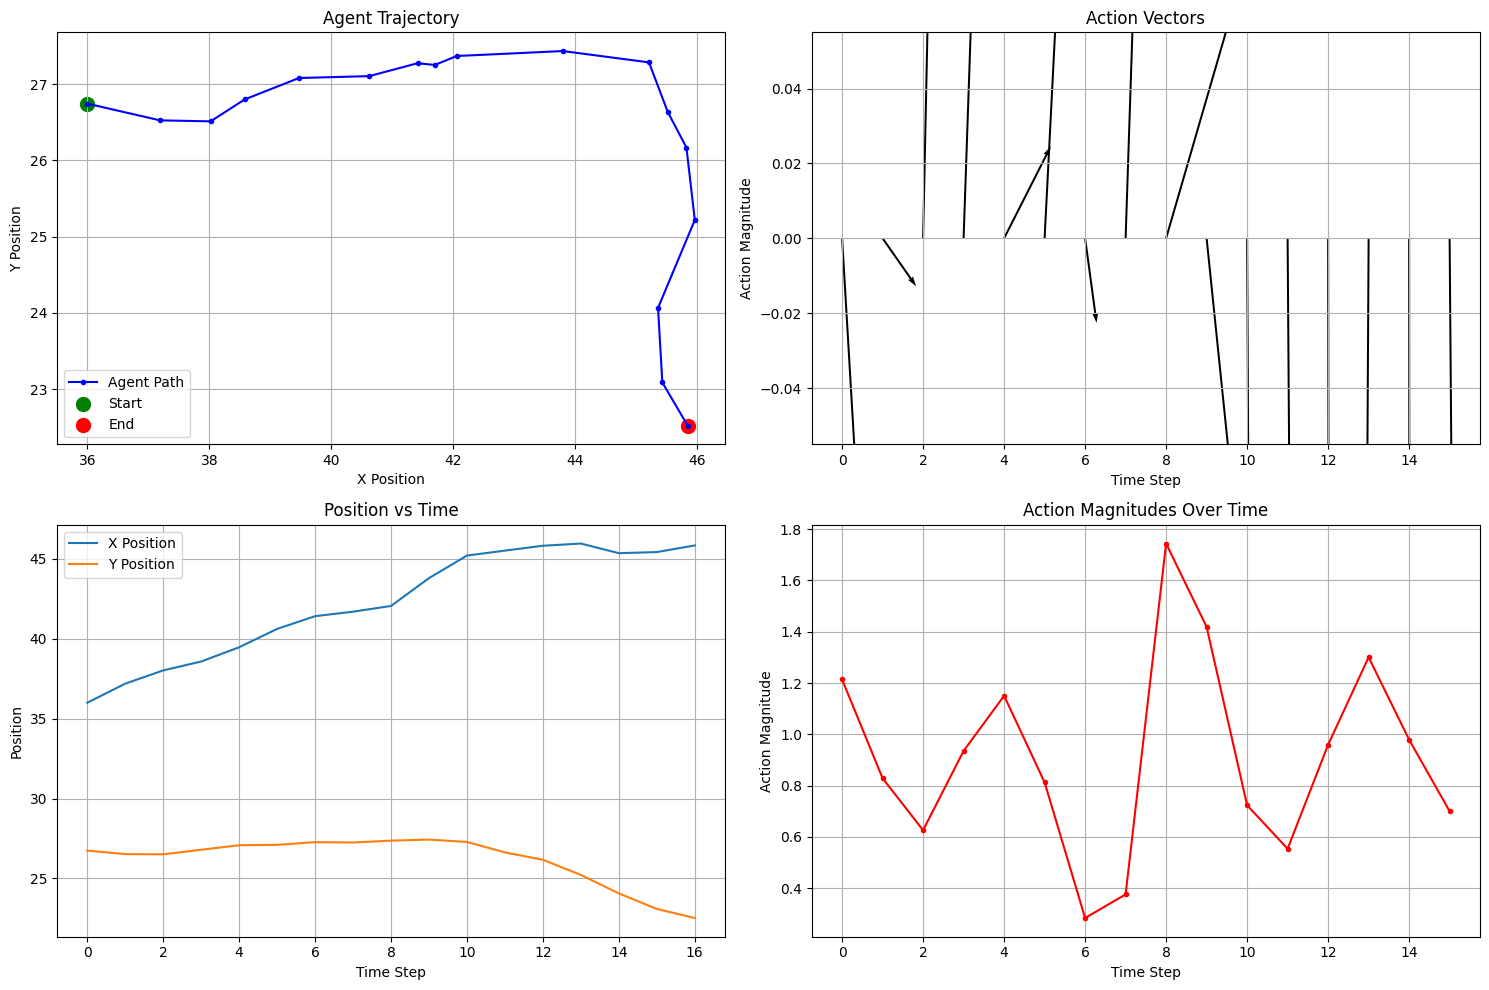


Trajectory Statistics:
Average action magnitude: 0.913
Max action magnitude: 1.744
Total distance traveled: 14.607

Analyzing trajectory from probe_normal/val
Trajectory visualization:


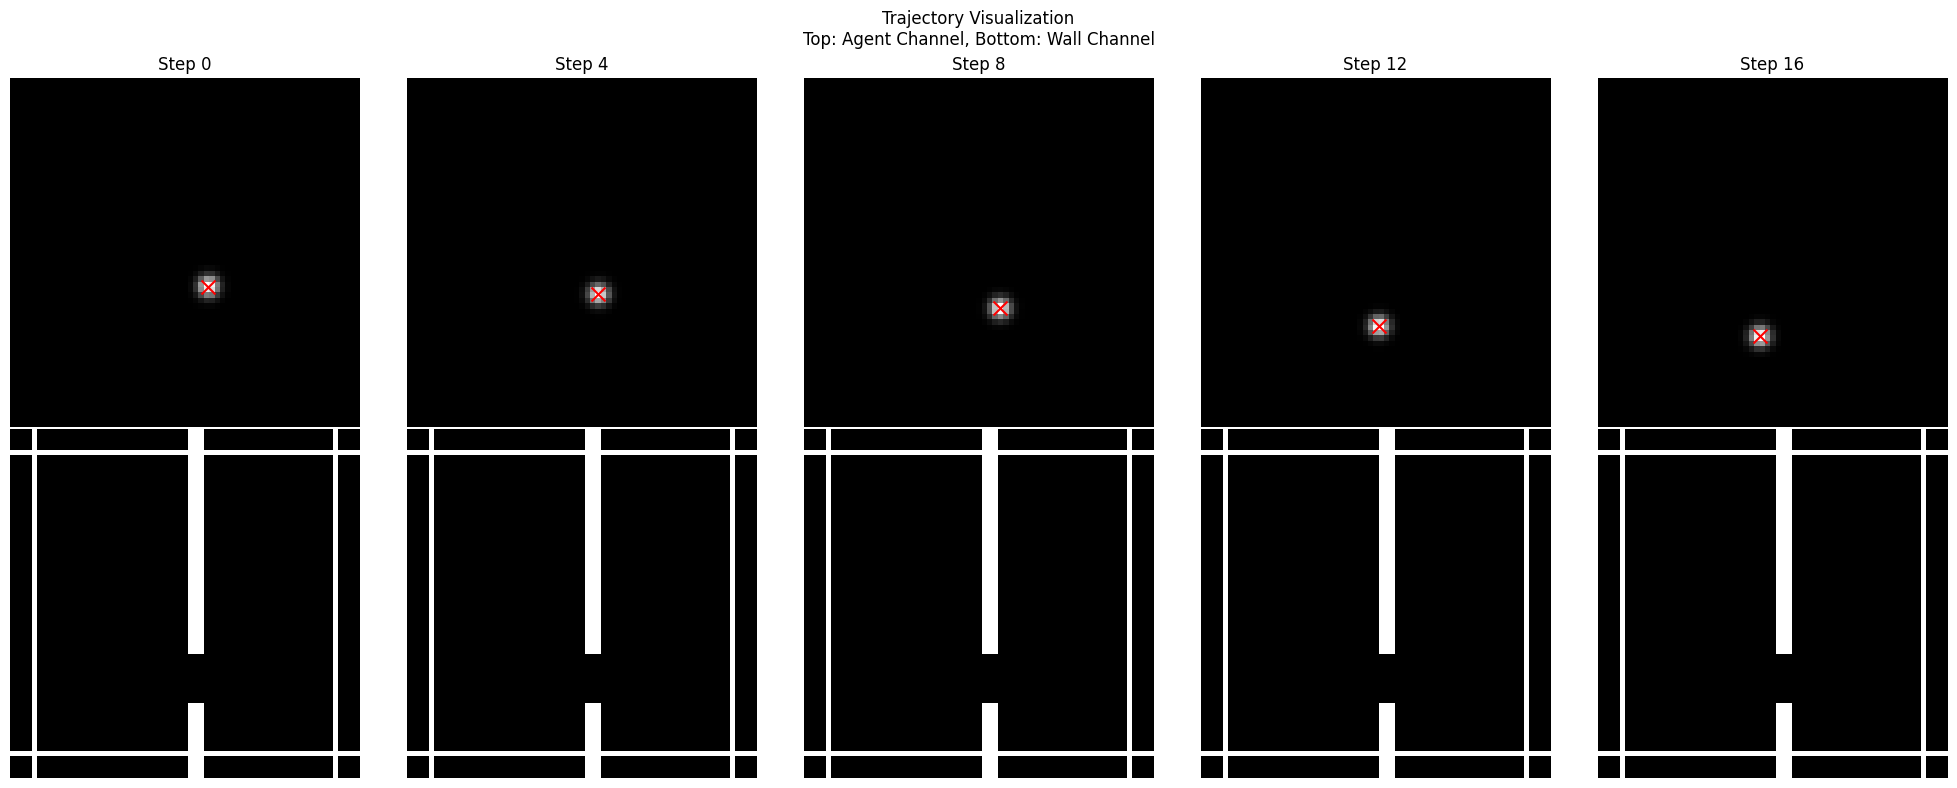

Detailed trajectory analysis:


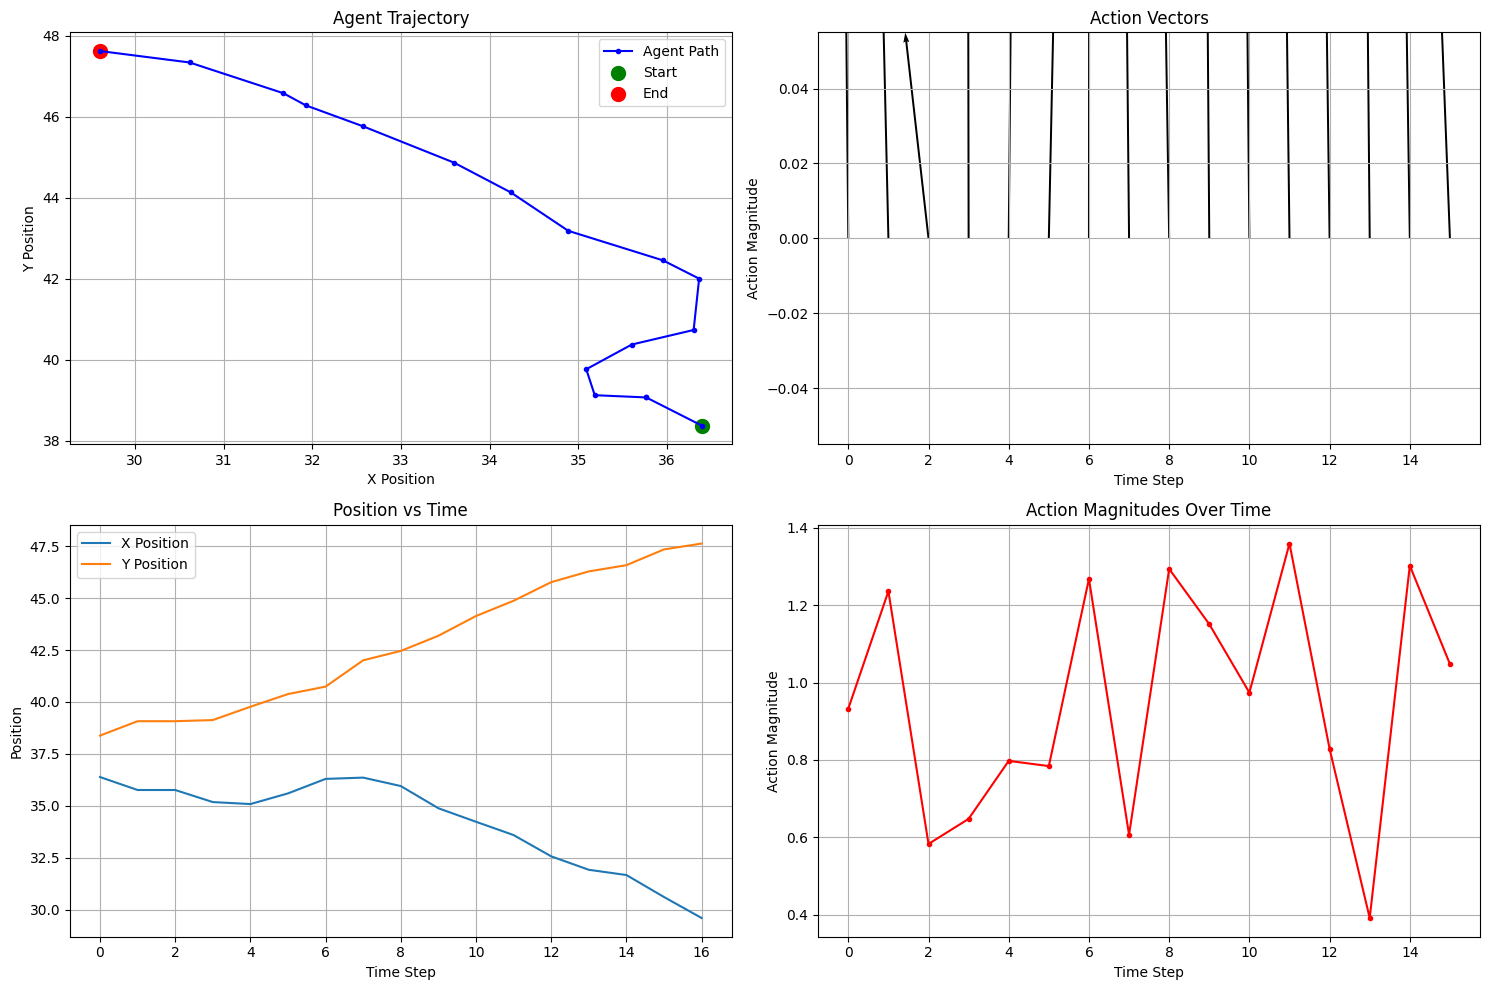


Trajectory Statistics:
Average action magnitude: 0.950
Max action magnitude: 1.360
Total distance traveled: 13.968

Analyzing trajectory from probe_wall/val
Trajectory visualization:


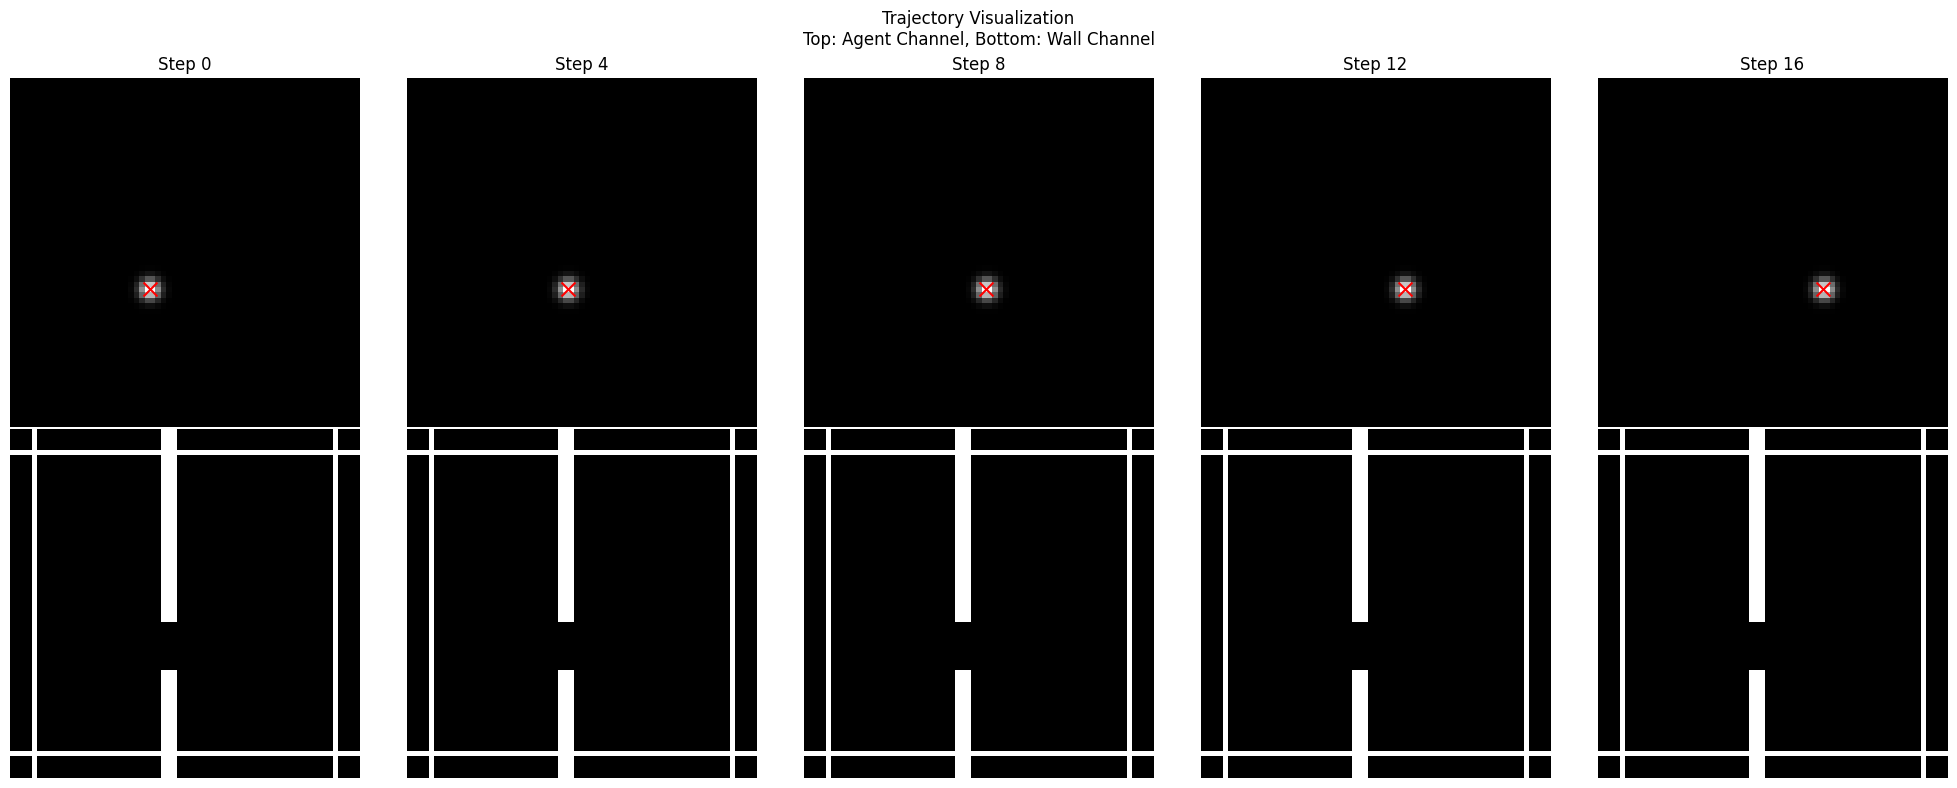

Detailed trajectory analysis:


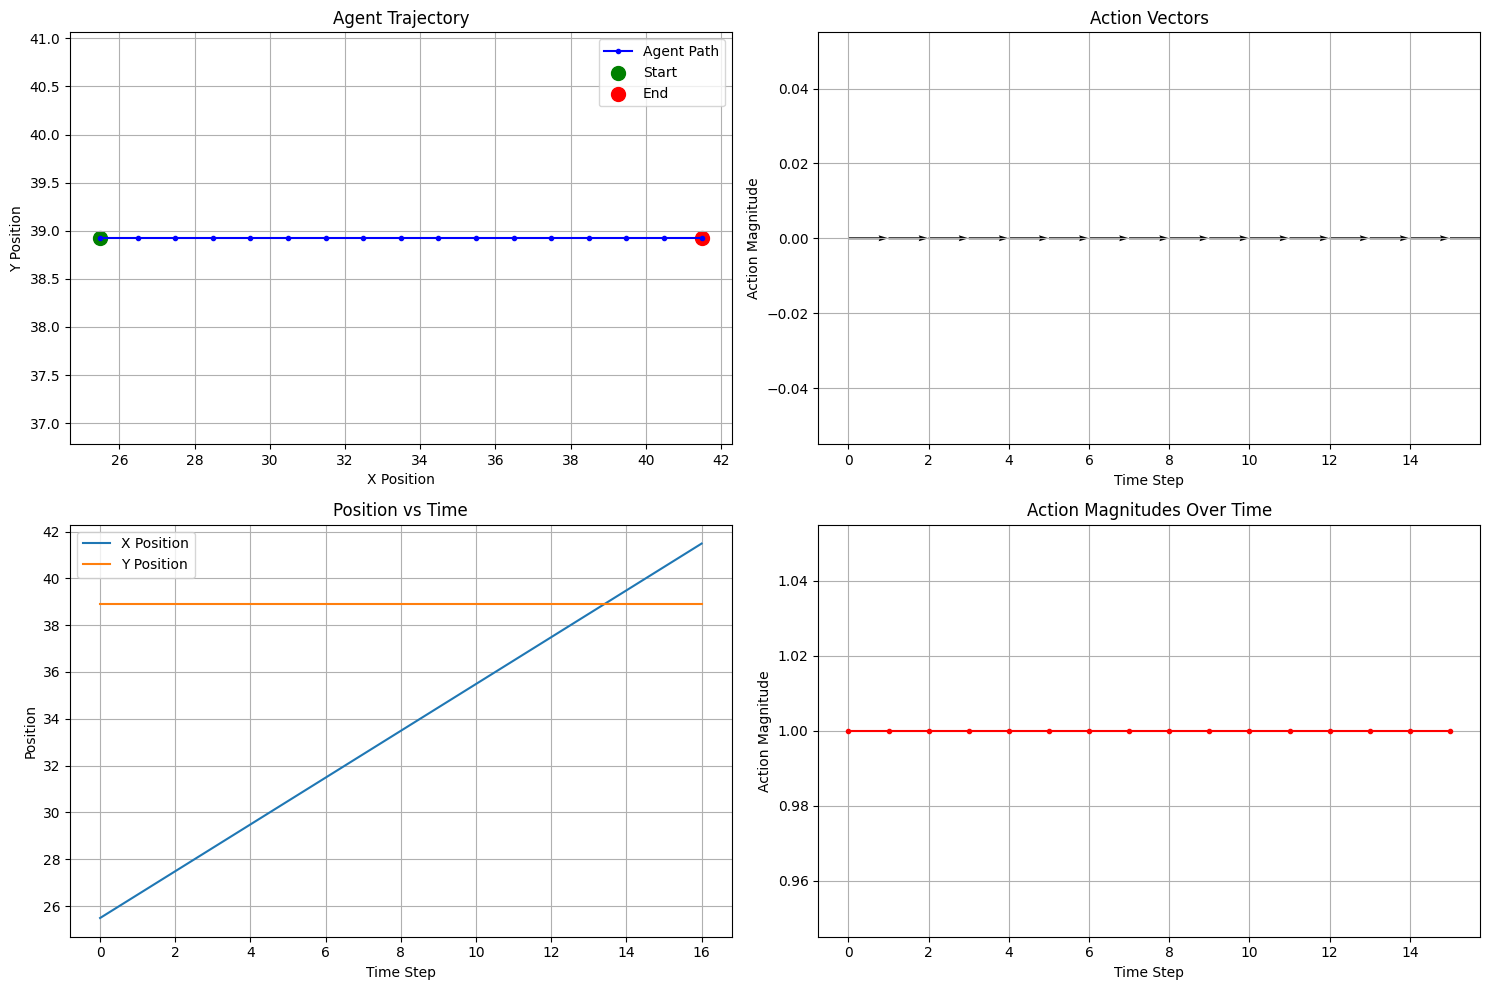


Trajectory Statistics:
Average action magnitude: 1.000
Max action magnitude: 1.000
Total distance traveled: 16.000


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

BASE_PATH = Path("/scratch/an3854/DL24FA")

def load_single_trajectory(folder_path, index=0):
    """Load a single trajectory with all its data."""
    data = {}
    
    # Load states, actions, and locations for a single trajectory
    states = np.load(folder_path / "states.npy", mmap_mode='r')
    actions = np.load(folder_path / "actions.npy", mmap_mode='r')
    
    data['states'] = states[index].copy()  # (17, 2, 65, 65)
    data['actions'] = actions[index].copy() # (16, 2)
    
    try:
        locations = np.load(folder_path / "locations.npy", mmap_mode='r')
        data['locations'] = locations[index].copy() # (17, 2)
    except FileNotFoundError:
        print("No locations file found")
    
    return data

def visualize_trajectory(traj_data, num_steps=5):
    """Visualize a trajectory showing agent movement and wall configuration."""
    states = traj_data['states']
    locations = traj_data.get('locations', None)
    
    # Select evenly spaced timesteps
    timesteps = np.linspace(0, states.shape[0]-1, num_steps, dtype=int)
    
    fig, axes = plt.subplots(2, num_steps, figsize=(num_steps*4, 8))
    plt.suptitle("Trajectory Visualization\nTop: Agent Channel, Bottom: Wall Channel")
    
    for i, t in enumerate(timesteps):
        # Agent channel
        axes[0, i].imshow(states[t, 0], cmap='gray')
        axes[0, i].set_title(f'Step {t}')
        if locations is not None:
            axes[0, i].scatter(locations[t, 0], locations[t, 1], 
                             c='red', marker='x', s=100, label='True Position')
        axes[0, i].axis('off')
        
        # Wall channel
        axes[1, i].imshow(states[t, 1], cmap='gray')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_trajectory_analysis(traj_data):
    """Plot detailed analysis of a single trajectory."""
    fig = plt.figure(figsize=(15, 10))
    
    # Plot agent path
    plt.subplot(2, 2, 1)
    locations = traj_data['locations']
    plt.plot(locations[:, 0], locations[:, 1], 'b.-', label='Agent Path')
    plt.scatter(locations[0, 0], locations[0, 1], c='g', s=100, label='Start')
    plt.scatter(locations[-1, 0], locations[-1, 1], c='r', s=100, label='End')
    plt.title('Agent Trajectory')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    
    # Plot actions
    plt.subplot(2, 2, 2)
    actions = traj_data['actions']
    plt.quiver(np.arange(len(actions)), np.zeros(len(actions)), 
              actions[:, 0], actions[:, 1], scale=1, angles='xy', scale_units='xy',
              width=0.003)
    plt.title('Action Vectors')
    plt.xlabel('Time Step')
    plt.ylabel('Action Magnitude')
    plt.grid(True)
    
    # Plot position over time
    plt.subplot(2, 2, 3)
    plt.plot(locations[:, 0], label='X Position')
    plt.plot(locations[:, 1], label='Y Position')
    plt.title('Position vs Time')
    plt.xlabel('Time Step')
    plt.ylabel('Position')
    plt.legend()
    plt.grid(True)
    
    # Plot action magnitudes
    plt.subplot(2, 2, 4)
    action_magnitudes = np.sqrt(np.sum(actions**2, axis=1))
    plt.plot(action_magnitudes, 'r.-')
    plt.title('Action Magnitudes Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Action Magnitude')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Load and analyze sample trajectories
datasets = ['probe_normal/train', 'probe_normal/val', 'probe_wall/val']

for dataset in datasets:
    print(f"\nAnalyzing trajectory from {dataset}")
    traj_data = load_single_trajectory(BASE_PATH / dataset)
    
    # Visualize trajectory
    print("Trajectory visualization:")
    visualize_trajectory(traj_data)
    
    # Plot detailed analysis
    print("Detailed trajectory analysis:")
    plot_trajectory_analysis(traj_data)
    
    # Print statistics
    print("\nTrajectory Statistics:")
    print(f"Average action magnitude: {np.mean(np.sqrt(np.sum(traj_data['actions']**2, axis=1))):.3f}")
    print(f"Max action magnitude: {np.max(np.sqrt(np.sum(traj_data['actions']**2, axis=1))):.3f}")
    print(f"Total distance traveled: {np.sum(np.sqrt(np.sum(np.diff(traj_data['locations'], axis=0)**2, axis=1))):.3f}")

Data Structure:
--------------------------------------------------

states:
Shape: (17, 2, 65, 65)

Example state data (first few values):
Agent channel (few pixels):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Wall channel (few pixels):
[[0.         0.         0.         0.         0.09416472]
 [0.         0.         0.         0.         0.09416472]
 [0.         0.         0.         0.         0.09416472]
 [0.         0.         0.         0.         0.09416472]
 [0.09416472 0.09416472 0.09416472 0.09416472 0.09416472]]

actions:
Shape: (16, 2)
Action at timestep 0: [ 1.1939982  -0.21942262]

locations:
Shape: (17, 2)
Location at timestep 0: [35.999184 26.743149]


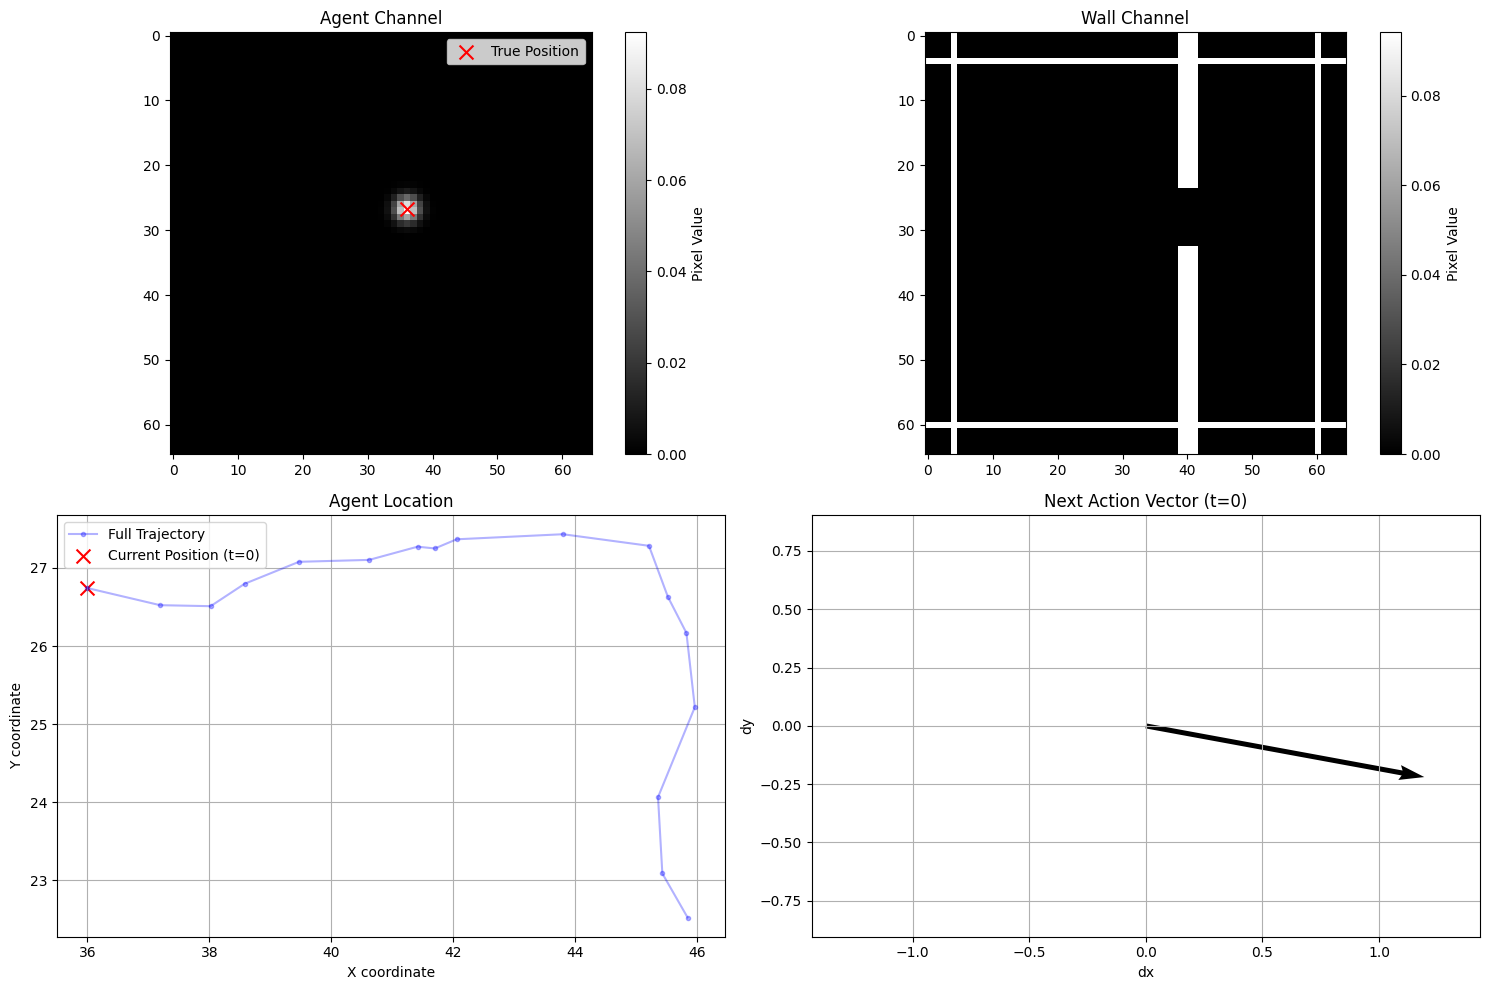


Numerical Analysis:
--------------------------------------------------

Action magnitude: 1.214
Action direction (degrees): -10.4

Distance from origin: 44.846

Unique values in channels:
Agent channel unique values: [0.000000e+00 1.401298e-45 2.802597e-45 ... 6.873364e-02 7.997741e-02
 9.235444e-02]
Wall channel unique values: [0.         0.09416472]


In [9]:
# Load a single trajectory from probe_normal/train
traj_data = load_single_trajectory(BASE_PATH / "probe_normal/train", index=0)
timestep = 0

# 1. Print shapes and data structure
print("Data Structure:")
print("-" * 50)
for key, value in traj_data.items():
    print(f"\n{key}:")
    print(f"Shape: {value.shape}")
    if key == 'states':
        print("\nExample state data (first few values):")
        print("Agent channel (few pixels):")
        print(value[timestep, 0, :5, :5])  # First 5x5 pixels of agent channel
        print("\nWall channel (few pixels):")
        print(value[timestep, 1, :5, :5])  # First 5x5 pixels of wall channel
    elif key == 'locations':
        print(f"Location at timestep {timestep}:", value[timestep])
    elif key == 'actions':
        print(f"Action at timestep {timestep}:", value[timestep])

# 2. Visualize the data
fig = plt.figure(figsize=(15, 10))

# Plot agent channel
plt.subplot(2, 2, 1)
plt.imshow(traj_data['states'][timestep, 0], cmap='gray')
plt.title('Agent Channel')
plt.colorbar(label='Pixel Value')
plt.scatter(traj_data['locations'][timestep, 0], 
           traj_data['locations'][timestep, 1], 
           c='red', marker='x', s=100, label='True Position')
plt.legend()

# Plot wall channel
plt.subplot(2, 2, 2)
plt.imshow(traj_data['states'][timestep, 1], cmap='gray')
plt.title('Wall Channel')
plt.colorbar(label='Pixel Value')

# Plot agent location
plt.subplot(2, 2, 3)
locations = traj_data['locations']
plt.scatter(locations[timestep, 0], locations[timestep, 1], 
           c='red', marker='x', s=100, label=f'Current Position (t={timestep})')
plt.plot(locations[:, 0], locations[:, 1], 'b.-', alpha=0.3, label='Full Trajectory')
plt.title('Agent Location')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True)
plt.legend()

# Plot next action
plt.subplot(2, 2, 4)
if timestep < len(traj_data['actions']):
    action = traj_data['actions'][timestep]
    plt.quiver(0, 0, action[0], action[1], 
              angles='xy', scale_units='xy', scale=1)
    plt.title(f'Next Action Vector (t={timestep})')
    plt.xlabel('dx')
    plt.ylabel('dy')
    plt.grid(True)
    # Make the plot square with equal axes
    plt.axis('equal')
    # Add some padding around the arrow
    max_val = max(abs(action[0]), abs(action[1])) * 1.2
    plt.xlim(-max_val, max_val)
    plt.ylim(-max_val, max_val)

plt.tight_layout()
plt.show()

# 3. Print detailed numerical analysis
print("\nNumerical Analysis:")
print("-" * 50)
if timestep < len(traj_data['actions']):
    action = traj_data['actions'][timestep]
    print(f"\nAction magnitude: {np.sqrt(np.sum(action**2)):.3f}")
    print(f"Action direction (degrees): {np.arctan2(action[1], action[0]) * 180 / np.pi:.1f}")

location = traj_data['locations'][timestep]
print(f"\nDistance from origin: {np.sqrt(np.sum(location**2)):.3f}")

# Print unique values in each channel to understand the data representation
print("\nUnique values in channels:")
print("Agent channel unique values:", np.unique(traj_data['states'][timestep, 0]))
print("Wall channel unique values:", np.unique(traj_data['states'][timestep, 1]))

DIRECTORY STRUCTURE AND DATA SIZES

Directory: probe_normal/train
----------------------------------------
States shape: (9984, 17, 2, 65, 65)
   - Number of trajectories: 9984
   - Timesteps per trajectory: 17
   - Number of channels: 2
   - Image dimensions: 65x65

Actions shape: (9984, 16, 2)
   - Number of actions per trajectory: 16
   - Action dimensions: 2

Locations shape: (9984, 17, 2)
   - Coordinate dimensions: 2

Directory: probe_normal/val
----------------------------------------
States shape: (3968, 17, 2, 65, 65)
   - Number of trajectories: 3968
   - Timesteps per trajectory: 17
   - Number of channels: 2
   - Image dimensions: 65x65

Actions shape: (3968, 16, 2)
   - Number of actions per trajectory: 16
   - Action dimensions: 2

Locations shape: (3968, 17, 2)
   - Coordinate dimensions: 2

Directory: probe_wall/val
----------------------------------------
States shape: (3968, 17, 2, 65, 65)
   - Number of trajectories: 3968
   - Timesteps per trajectory: 17
   - Number

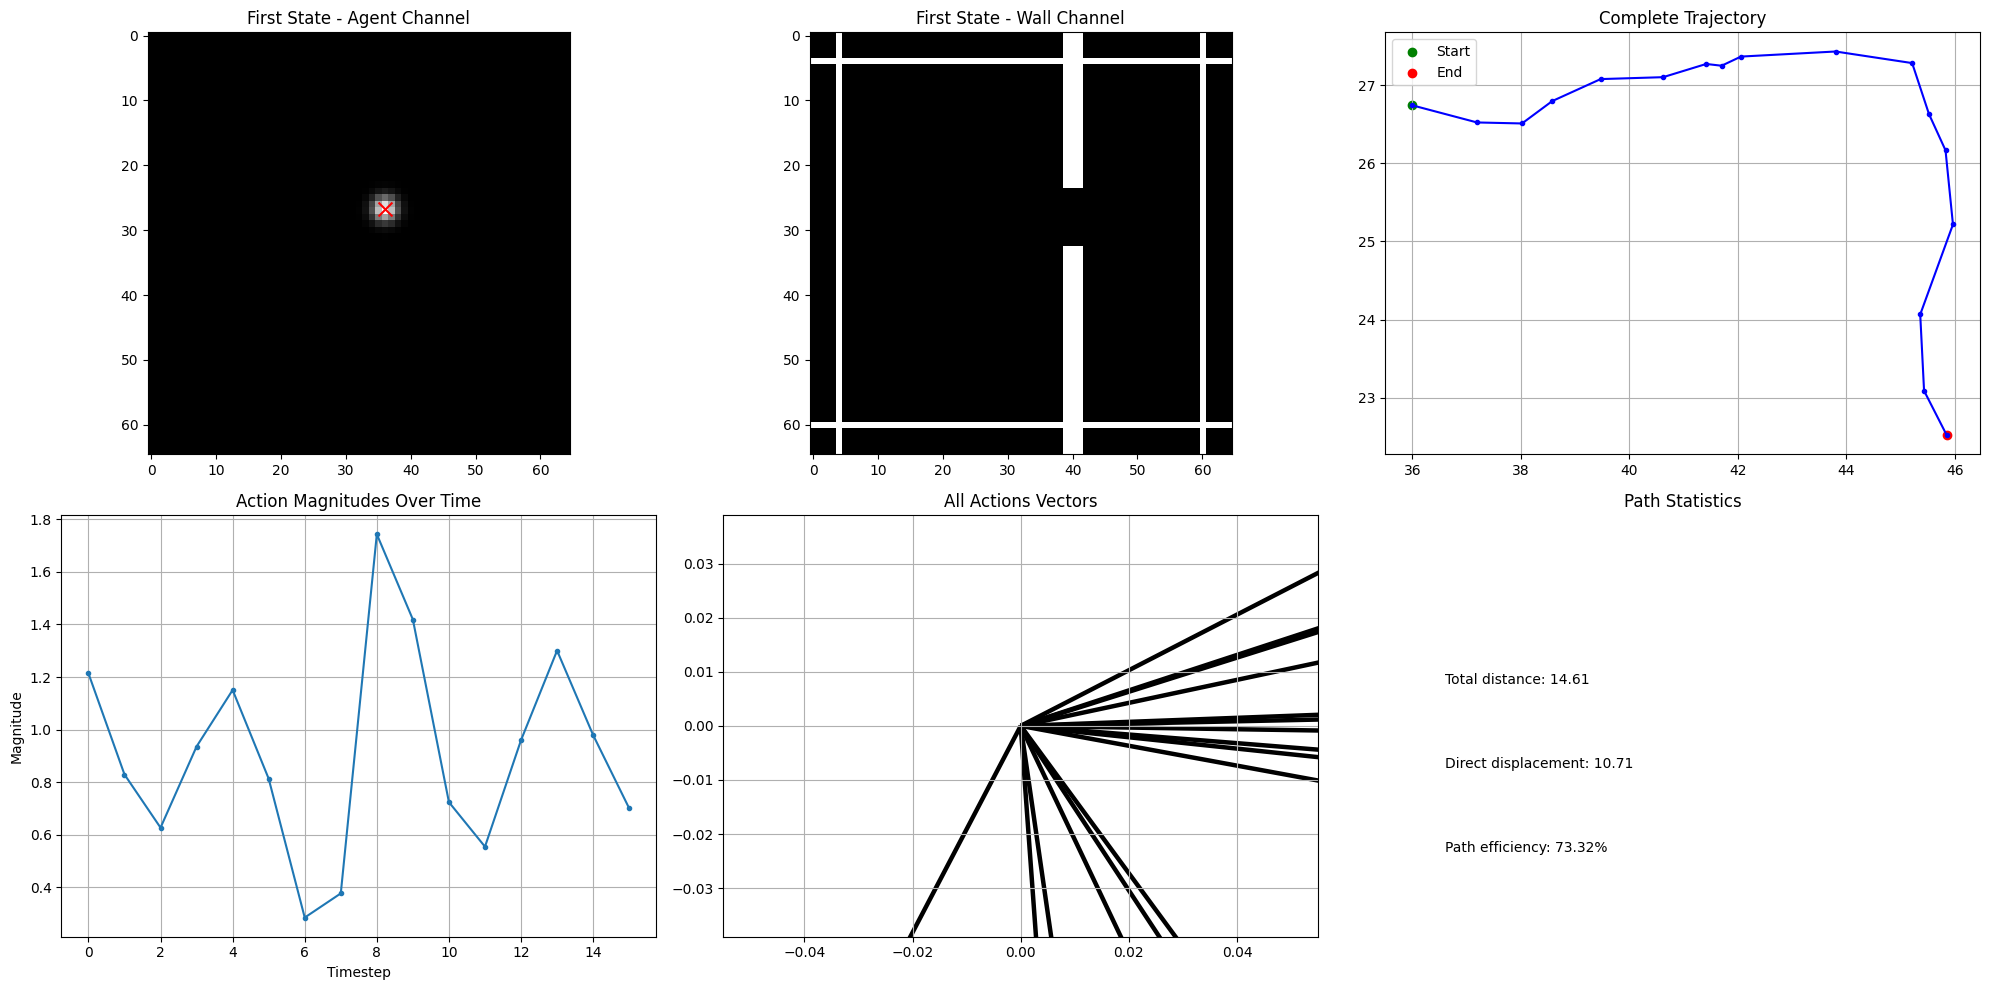

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BASE_PATH = Path("/scratch/an3854/DL24FA")

# First, let's examine ALL directories and their data sizes
def analyze_directory_structure():
    print("=" * 80)
    print("DIRECTORY STRUCTURE AND DATA SIZES")
    print("=" * 80)
    
    directories = {
        'probe_normal/train': BASE_PATH / 'probe_normal/train',
        'probe_normal/val': BASE_PATH / 'probe_normal/val',
        'probe_wall/val': BASE_PATH / 'probe_wall/val'
    }
    
    for name, path in directories.items():
        print(f"\nDirectory: {name}")
        print("-" * 40)
        
        # Load data shapes using memory mapping
        states = np.load(path / "states.npy", mmap_mode='r')
        actions = np.load(path / "actions.npy", mmap_mode='r')
        locations = np.load(path / "locations.npy", mmap_mode='r')
        
        print(f"States shape: {states.shape}")
        print(f"   - Number of trajectories: {states.shape[0]}")
        print(f"   - Timesteps per trajectory: {states.shape[1]}")
        print(f"   - Number of channels: {states.shape[2]}")
        print(f"   - Image dimensions: {states.shape[3]}x{states.shape[4]}")
        
        print(f"\nActions shape: {actions.shape}")
        print(f"   - Number of actions per trajectory: {actions.shape[1]}")
        print(f"   - Action dimensions: {actions.shape[2]}")
        
        print(f"\nLocations shape: {locations.shape}")
        print(f"   - Coordinate dimensions: {locations.shape[2]}")

# Now let's analyze one complete trajectory in detail
def analyze_single_trajectory(directory_name="probe_normal/train", index=0):
    print("\n" + "=" * 80)
    print(f"DETAILED ANALYSIS OF SINGLE TRAJECTORY FROM {directory_name}")
    print("=" * 80)
    
    path = BASE_PATH / directory_name
    
    # Load single trajectory
    states = np.load(path / "states.npy", mmap_mode='r')[index]
    actions = np.load(path / "actions.npy", mmap_mode='r')[index]
    locations = np.load(path / "locations.npy", mmap_mode='r')[index]
    
    print("\nTRAJECTORY STATISTICS:")
    print("-" * 40)
    print(f"Total timesteps: {len(states)}")
    print(f"Total actions: {len(actions)}")
    
    # Analyze states
    print("\nSTATES ANALYSIS:")
    print("-" * 40)
    print("Agent channel (channel 0) stats:")
    print(f"   - Value range: [{np.min(states[:, 0])}, {np.max(states[:, 0])}]")
    print(f"   - Unique values: {np.unique(states[:, 0])}")
    
    print("\nWall channel (channel 1) stats:")
    print(f"   - Value range: [{np.min(states[:, 1])}, {np.max(states[:, 1])}]")
    print(f"   - Unique values: {np.unique(states[:, 1])}")
    
    # Analyze locations
    print("\nLOCATION ANALYSIS:")
    print("-" * 40)
    print(f"X coordinate range: [{np.min(locations[:, 0])}, {np.max(locations[:, 0])}]")
    print(f"Y coordinate range: [{np.min(locations[:, 1])}, {np.max(locations[:, 1])}]")
    
    # Analyze actions
    print("\nACTION ANALYSIS:")
    print("-" * 40)
    action_magnitudes = np.sqrt(np.sum(actions**2, axis=1))
    print(f"Action magnitude range: [{np.min(action_magnitudes)}, {np.max(action_magnitudes)}]")
    print(f"Average action magnitude: {np.mean(action_magnitudes):.3f}")
    
    # Visualize complete trajectory
    fig = plt.figure(figsize=(20, 10))
    
    # Plot first and last states
    plt.subplot(2, 3, 1)
    plt.imshow(states[0, 0], cmap='gray')
    plt.title('First State - Agent Channel')
    plt.scatter(locations[0, 0], locations[0, 1], c='red', marker='x', s=100)
    
    plt.subplot(2, 3, 2)
    plt.imshow(states[0, 1], cmap='gray')
    plt.title('First State - Wall Channel')
    
    plt.subplot(2, 3, 3)
    plt.plot(locations[:, 0], locations[:, 1], 'b.-')
    plt.scatter(locations[0, 0], locations[0, 1], c='green', label='Start')
    plt.scatter(locations[-1, 0], locations[-1, 1], c='red', label='End')
    plt.title('Complete Trajectory')
    plt.legend()
    plt.grid(True)
    
    # Plot action characteristics
    plt.subplot(2, 3, 4)
    plt.plot(action_magnitudes, '.-')
    plt.title('Action Magnitudes Over Time')
    plt.xlabel('Timestep')
    plt.ylabel('Magnitude')
    plt.grid(True)
    
    plt.subplot(2, 3, 5)
    plt.quiver(np.zeros_like(actions[:, 0]), np.zeros_like(actions[:, 1]),
              actions[:, 0], actions[:, 1], scale=1, angles='xy', scale_units='xy')
    plt.title('All Actions Vectors')
    plt.grid(True)
    plt.axis('equal')
    
    plt.subplot(2, 3, 6)
    total_distance = np.sum(action_magnitudes)
    displacement = np.sqrt(np.sum((locations[-1] - locations[0])**2))
    plt.text(0.1, 0.6, f'Total distance: {total_distance:.2f}')
    plt.text(0.1, 0.4, f'Direct displacement: {displacement:.2f}')
    plt.text(0.1, 0.2, f'Path efficiency: {displacement/total_distance:.2%}')
    plt.axis('off')
    plt.title('Path Statistics')
    
    plt.tight_layout()
    plt.show()

# Run both analyses
analyze_directory_structure()
analyze_single_trajectory()

In [11]:
# Load a single trajectory
path = BASE_PATH / "probe_normal/train"
states = np.load(path / "states.npy", mmap_mode='r')[0]    # Shape: (17, 2, 65, 65)
actions = np.load(path / "actions.npy", mmap_mode='r')[0]  # Shape: (16, 2)
locations = np.load(path / "locations.npy", mmap_mode='r')[0] # Shape: (17, 2)

print("Understanding the data structure:")
print("-" * 50)

# Explain why 16 vs 17
print("\nTimestep relationships:")
print(f"Number of states/locations: {len(states)} (17 timesteps)")
print(f"Number of actions: {len(actions)} (16 timesteps)")
print("Why? Because actions occur BETWEEN states. Think of it as:")
print("state[0] -> action[0] -> state[1] -> action[1] -> state[2] ... -> state[16]")

# Show the actual values for first few timesteps
print("\nFirst 3 timesteps of trajectory:")
for t in range(3):
    print(f"\nTimestep {t}:")
    print(f"Location: {locations[t]} (absolute x,y coordinates in the 65x65 grid)")
    if t < len(actions):
        print(f"Action: {actions[t]} (delta movement: dx,dy)")
        # Calculate where this action leads
        print(f"This action leads to location: {locations[t+1]}")
        print(f"Verification - previous location + action ≈ new location:")
        print(f"Expected: {locations[t] + actions[t]}")
        print(f"Actual: {locations[t+1]}")

print("\nWhy separate actions and locations?")
print("1. Actions represent CONTROL (what the agent does):")
print("   - They are the actual decisions/movements made")
print("   - Values are relative changes (dx, dy)")
print("   - Example: action[0] =", actions[0], "means move by that delta")

print("\n2. Locations represent STATE (where the agent is):")
print("   - They are absolute positions in the environment")
print("   - Values are coordinates in the 65x65 grid")
print("   - Example: location[0] =", locations[0], "is the absolute position")

print("\n3. Relationship:")
print("   - Actions determine how locations change")
print("   - But actions might not perfectly predict next location due to:")
print("     * Wall collisions (can't move through walls)")
print("     * Environment constraints")
print("     * Door positions")

Understanding the data structure:
--------------------------------------------------

Timestep relationships:
Number of states/locations: 17 (17 timesteps)
Number of actions: 16 (16 timesteps)
Why? Because actions occur BETWEEN states. Think of it as:
state[0] -> action[0] -> state[1] -> action[1] -> state[2] ... -> state[16]

First 3 timesteps of trajectory:

Timestep 0:
Location: [35.999184 26.743149] (absolute x,y coordinates in the 65x65 grid)
Action: [ 1.1939982  -0.21942262] (delta movement: dx,dy)
This action leads to location: [37.193184 26.523726]
Verification - previous location + action ≈ new location:
Expected: [37.19318  26.523726]
Actual: [37.193184 26.523726]

Timestep 1:
Location: [37.193184 26.523726] (absolute x,y coordinates in the 65x65 grid)
Action: [ 0.82859933 -0.0128235 ] (delta movement: dx,dy)
This action leads to location: [38.021782 26.510902]
Verification - previous location + action ≈ new location:
Expected: [38.021782 26.510902]
Actual: [38.021782 26.5109

In [12]:
# Load a single trajectory
path = BASE_PATH / "probe_normal/train"
states = np.load(path / "states.npy", mmap_mode='r')[0]    
actions = np.load(path / "actions.npy", mmap_mode='r')[0]  
locations = np.load(path / "locations.npy", mmap_mode='r')[0]

print("Looking at first 5 timesteps of a trajectory:")
print("-" * 60)

for t in range(5):
   print(f"\nTimestep {t}:")
   print(f"Location: {locations[t].round(3)} (x={locations[t,0]:.3f}, y={locations[t,1]:.3f})")
   if t < len(actions):
       print(f"Action: {actions[t].round(3)} (dx={actions[t,0]:.3f}, dy={actions[t,1]:.3f})")
       # Show the effect of this action
       print(f"Effect of action:")
       print(f"   Starting at: {locations[t].round(3)}")
       print(f"   Move by: {actions[t].round(3)}")
       print(f"   End at: {locations[t+1].round(3)}")

# Show ranges across entire trajectory
print("\nOverall Statistics:")
print("-" * 60)
print("\nLocation ranges:")
print(f"x coordinates range: [{locations[:,0].min():.3f}, {locations[:,0].max():.3f}]")
print(f"y coordinates range: [{locations[:,1].min():.3f}, {locations[:,1].max():.3f}]")

print("\nAction ranges:")
print(f"dx range: [{actions[:,0].min():.3f}, {actions[:,0].max():.3f}]")
print(f"dy range: [{actions[:,1].min():.3f}, {actions[:,1].max():.3f}]")

Looking at first 5 timesteps of a trajectory:
------------------------------------------------------------

Timestep 0:
Location: [35.999 26.743] (x=35.999, y=26.743)
Action: [ 1.194 -0.219] (dx=1.194, dy=-0.219)
Effect of action:
   Starting at: [35.999 26.743]
   Move by: [ 1.194 -0.219]
   End at: [37.193 26.524]

Timestep 1:
Location: [37.193 26.524] (x=37.193, y=26.524)
Action: [ 0.829 -0.013] (dx=0.829, dy=-0.013)
Effect of action:
   Starting at: [37.193 26.524]
   Move by: [ 0.829 -0.013]
   End at: [38.022 26.511]

Timestep 2:
Location: [38.022 26.511] (x=38.022, y=26.511)
Action: [0.557 0.286] (dx=0.557, dy=0.286)
Effect of action:
   Starting at: [38.022 26.511]
   Move by: [0.557 0.286]
   End at: [38.579 26.797]

Timestep 3:
Location: [38.579 26.797] (x=38.579, y=26.797)
Action: [0.892 0.282] (dx=0.892, dy=0.282)
Effect of action:
   Starting at: [38.579 26.797]
   Move by: [0.892 0.282]
   End at: [39.471 27.079]

Timestep 4:
Location: [39.471 27.079] (x=39.471, y=27.079)

In [13]:
# Let's look at another trajectory (index 1)
states2 = np.load(path / "states.npy", mmap_mode='r')[1]    
actions2 = np.load(path / "actions.npy", mmap_mode='r')[1]  
locations2 = np.load(path / "locations.npy", mmap_mode='r')[1]

print("\nComparing with another trajectory (first 5 timesteps):")
print("-" * 60)

for t in range(5):
    print(f"\nTimestep {t}:")
    print(f"Location: {locations2[t].round(3)} (x={locations2[t,0]:.3f}, y={locations2[t,1]:.3f})")
    if t < len(actions2):
        print(f"Action: {actions2[t].round(3)} (dx={actions2[t,0]:.3f}, dy={actions2[t,1]:.3f})")


Comparing with another trajectory (first 5 timesteps):
------------------------------------------------------------

Timestep 0:
Location: [48.359 46.094] (x=48.359, y=46.094)
Action: [-1.686 -0.377] (dx=-1.686, dy=-0.377)

Timestep 1:
Location: [46.673 45.718] (x=46.673, y=45.718)
Action: [-0.568  0.165] (dx=-0.568, dy=0.165)

Timestep 2:
Location: [46.105 45.882] (x=46.105, y=45.882)
Action: [-0.247  0.029] (dx=-0.247, dy=0.029)

Timestep 3:
Location: [45.858 45.912] (x=45.858, y=45.912)
Action: [-1.094  0.168] (dx=-1.094, dy=0.168)

Timestep 4:
Location: [44.764 46.08 ] (x=44.764, y=46.080)
Action: [-0.878  0.471] (dx=-0.878, dy=0.471)


In [14]:
path = BASE_PATH / "probe_normal/train"

# Load first trajectory (index 0)
actions = np.load(path / "actions.npy", mmap_mode='r')[0]  # Shape (16, 2)
locations = np.load(path / "locations.npy", mmap_mode='r')[0]  # Shape (17, 2)

print("Full Action Matrix (16 timesteps, 2 dimensions):")
print("-" * 50)
print("Format: [dx, dy] for each timestep")
print("Shape:", actions.shape)
print("\nActions:")
for t in range(len(actions)):
   print(f"t={t:2d}: [{actions[t,0]:7.3f}, {actions[t,1]:7.3f}]")

print("\nFull Location Matrix (17 timesteps, 2 dimensions):")
print("-" * 50)
print("Format: [x, y] coordinates for each timestep")
print("Shape:", locations.shape)
print("\nLocations:")
for t in range(len(locations)):
   print(f"t={t:2d}: [{locations[t,0]:7.3f}, {locations[t,1]:7.3f}]")

Full Action Matrix (16 timesteps, 2 dimensions):
--------------------------------------------------
Format: [dx, dy] for each timestep
Shape: (16, 2)

Actions:
t= 0: [  1.194,  -0.219]
t= 1: [  0.829,  -0.013]
t= 2: [  0.557,   0.286]
t= 3: [  0.892,   0.282]
t= 4: [  1.150,   0.025]
t= 5: [  0.795,   0.169]
t= 6: [  0.283,  -0.023]
t= 7: [  0.357,   0.117]
t= 8: [  1.743,   0.065]
t= 9: [  1.411,  -0.148]
t=10: [  0.310,  -0.653]
t=11: [  0.304,  -0.463]
t=12: [  0.137,  -0.950]
t=13: [ -0.603,  -1.152]
t=14: [  0.071,  -0.976]
t=15: [  0.414,  -0.564]

Full Location Matrix (17 timesteps, 2 dimensions):
--------------------------------------------------
Format: [x, y] coordinates for each timestep
Shape: (17, 2)

Locations:
t= 0: [ 35.999,  26.743]
t= 1: [ 37.193,  26.524]
t= 2: [ 38.022,  26.511]
t= 3: [ 38.579,  26.797]
t= 4: [ 39.471,  27.079]
t= 5: [ 40.621,  27.103]
t= 6: [ 41.416,  27.273]
t= 7: [ 41.699,  27.250]
t= 8: [ 42.056,  27.367]
t= 9: [ 43.799,  27.432]
t=10: [ 45.210,

In [15]:
# Load a trajectory from probe_wall/val
path = BASE_PATH / "probe_wall/val"
wall_actions = np.load(path / "actions.npy", mmap_mode='r')[0]
wall_locations = np.load(path / "locations.npy", mmap_mode='r')[0]

print("Examining a wall collision trajectory:")
print("-" * 50)
for t in range(len(wall_actions)):
    # Calculate actual movement vs intended movement
    intended_movement = wall_actions[t]
    actual_movement = wall_locations[t+1] - wall_locations[t]
    
    print(f"\nTimestep {t}:")
    print(f"Intended movement (action): [{wall_actions[t,0]:7.3f}, {wall_actions[t,1]:7.3f}]")
    print(f"Actual movement:           [{actual_movement[0]:7.3f}, {actual_movement[1]:7.3f}]")
    
    # Check if there's a significant difference (might indicate wall collision)
    if np.linalg.norm(intended_movement - actual_movement) > 0.5:
        print(">>> Possible wall collision (intended movement != actual movement)")

Examining a wall collision trajectory:
--------------------------------------------------

Timestep 0:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 1:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 2:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 3:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 4:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 5:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 6:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 7:
Intended movement (action): [  1.000,   0.000]
Actual movement:           [  1.000,   0.000]

Timestep 8:
Intended movement (action): [  1.000,   0.000]
Ac